# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [33]:
# import libaries that i will need in the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime


In [36]:
# Downloading the WeRateDogs twitter archive dataset manually and loading it into pandas
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [39]:
twitter_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
import requests
image_predictions = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

with open('image-predictions.tsv',mode='wb')as file:
    file.write(image_predictions.content)


In [37]:
# Programatically downloaded image_predictions.tsv using the requests library and the provided URL
image_predictions = pd.read_csv('image-predictions.tsv',sep='\t')
image_predictions.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [8]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808

Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062: 741303864243200000
Success
10

Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
13

Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
15

Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
18

Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
20

Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
23

In [38]:
tweet_json = pd.read_json('tweet_json.txt', lines=True)
tweet_json


contributors  coordinates          created_at display_text_range  \
0              NaN          NaN 2017-08-01 16:23:56            [0, 85]   
1              NaN          NaN 2017-08-01 00:17:27           [0, 138]   
2              NaN          NaN 2017-07-31 00:18:03           [0, 121]   
3              NaN          NaN 2017-07-30 15:58:51            [0, 79]   
4              NaN          NaN 2017-07-29 16:00:24           [0, 138]   
5              NaN          NaN 2017-07-29 00:08:17           [0, 138]   
6              NaN          NaN 2017-07-28 16:27:12           [0, 140]   
7              NaN          NaN 2017-07-28 00:22:40           [0, 118]   
8              NaN          NaN 2017-07-27 16:25:51           [0, 122]   
9              NaN          NaN 2017-07-26 15:59:51           [0, 133]   
10             NaN          NaN 2017-07-26 00:31:25           [0, 130]   
11             NaN          NaN 2017-07-25 16:11:53           [0, 107]   
12             NaN          NaN 2017-07-25 01:55:32           [0, 106]   
13             NaN          NaN 2017-07-25 00:10:02            [0, 91]   
14             NaN          NaN 2017-07-24 17:02:04           [0, 118]   
15             NaN          NaN 2017-07-24 00:19:32           [0, 138]   
16             NaN          NaN 2017-07-23 00:22:39            [0, 86]   
17             NaN          NaN 2017-07-22 16:56:37           [0, 128]   
18             NaN          NaN 2017-07-22 00:23:06            [0, 87]   
19             NaN          NaN 2017-07-20 16:49:33           [0, 127]   
20             NaN          NaN 2017-07-19 16:06:48           [0, 127]   
21             NaN          NaN 2017-07-19 03:39:09           [0, 108]   
22             NaN          NaN 2017-07-19 00:47:34            [0, 99]   
23             NaN          NaN 2017-07-18 16:08:03            [0, 88]   
24             NaN          NaN 2017-07-18 00:07:08           [0, 129]   
25             NaN          NaN 2017-07-17 16:17:36           [0, 101]   
26             NaN          NaN 2017-07-16 23:58:41           [0, 121]   
27             NaN          NaN 2017-07-16 20:14:00            [0, 71]   
28             NaN          NaN 2017-07-15 23:25:31           [0, 131]   
29             NaN          NaN 2017-07-15 16:51:35          [27, 105]   
...            ...          ...                 ...                ...   
2296           NaN          NaN 2015-11-17 00:24:19           [0, 140]   
2297           NaN          NaN 2015-11-17 00:06:54           [0, 139]   
2298           NaN          NaN 2015-11-16 23:23:41           [0, 137]   
2299           NaN          NaN 2015-11-16 21:54:18            [0, 81]   
2300           NaN          NaN 2015-11-16 21:10:36           [0, 140]   
2301           NaN          NaN 2015-11-16 20:32:58           [0, 135]   
2302           NaN          NaN 2015-11-16 20:01:42           [0, 112]   
2303           NaN          NaN 2015-11-16 19:31:45           [0, 139]   
2304           NaN          NaN 2015-11-16 16:37:02           [0, 138]   
2305           NaN          NaN 2015-11-16 16:11:11           [0, 136]   
2306           NaN          NaN 2015-11-16 15:14:19            [0, 46]   
2307           NaN          NaN 2015-11-16 14:57:41            [0, 82]   
2308           NaN          NaN 2015-11-16 04:02:55           [0, 134]   
2309           NaN          NaN 2015-11-16 03:55:04           [0, 128]   
2310           NaN          NaN 2015-11-16 03:44:34           [0, 140]   
2311           NaN          NaN 2015-11-16 03:22:39           [0, 132]   
2312           NaN          NaN 2015-11-16 02:38:37           [0, 125]   
2313           NaN          NaN 2015-11-16 01:59:36           [0, 137]   
2314           NaN          NaN 2015-11-16 01:52:02           [0, 137]   
2315           NaN          NaN 2015-11-16 01:22:45           [0, 107]   
2316           NaN          NaN 2015-11-16 01:01:59           [0, 135]   
2317           NaN          NaN 2015-11-16 00:55:59           [0, 124]   
2318      

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [40]:
# Display the twitter_archive dataframe (1st dataset)
twitter_archive

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
...                  ...                    ...                  ...   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN         

In [48]:
# Randomly looking at some rows in the twitter_archive dataframe
twitter_archive.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2354  666029285002620928                    NaN                  NaN   
2168  669354382627049472                    NaN                  NaN   
989   748932637671223296                    NaN                  NaN   
1113  733109485275860992                    NaN                  NaN   
812   771136648247640064                    NaN                  NaN   

                      timestamp  \
2354  2015-11-15 23:05:30 +0000   
2168  2015-11-25 03:18:15 +0000   
989   2016-07-01 17:33:49 +0000   
1113  2016-05-19 01:38:16 +0000   
812   2016-09-01 00:04:38 +0000   

                                                 source  \
2354  <a href="http://twitter.com/download/iphone" r...   
2168  <a href="http://twitter.com/download/iphone" r...   
989   <a href="http://twitter.com/download/iphone" r...   
1113  <a href="http://twitter.com/download/iphone" r...   
812   <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2168  Meet Dug. Dug fucken loves peaches. 8/10 https...                  NaN   
989   Say hello to Divine Doggo. Must be magical af....                  NaN   
1113  Like father (doggo), like son (pupper). Both 1...                  NaN   
812   This is Dixie. She wants to be a ship captain....                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2354                       NaN                        NaN   
2168                       NaN                        NaN   
989                        NaN                        NaN   
1113                       NaN                        NaN   
812                        NaN                        NaN   

                                          expanded_urls  rating_numerator  \
2354  https://twitter.com/dog_rates/status/666029285...                 7   
2168  https://twitter.com/dog_rates/status/669354382...                 8   
989   https://twitter.com/dog_rates/status/748932637...                13   
1113  https://twitter.com/dog_rates/status/733109485...                12   
812   https://twitter.com/dog_rates/status/771136648...                11   

      rating_denominator    name  doggo floofer  pupper puppo  
2354                  10       a   None    None    None  None  
2168                  10     Dug   None    None    None  None  
989                   10  Divine  doggo    None    None  None  
1113                  10    None  doggo    None  pupper  None  
812                   10   Dixie   None    None    None  None

In [42]:
# Dimensions of the dataframe (columns and rows)
twitter_archive.shape

(2356, 17)

In [47]:
# Column names in the twitter_archive dataframe
twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [43]:
# Concise sumary of the dataframe
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [57]:
# Looking for columns with null values
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [45]:
# Looking for duplicated rows
twitter_archive.duplicated().sum()

0

In [46]:
# Looking for unique values in the columns
twitter_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [27]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [28]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [49]:
# Looking for retweets in the twitter_archive dataframe
len(twitter_archive[twitter_archive['retweeted_status_id'].notnull()])

181

In [50]:
# Displaying the image_predictions dataframe (2nd dataset)
image_predictions

tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    666071193221509120    https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12    666073100786774016    https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13    666082916733198337    https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14    666094000022159362    https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15    666099513787052032    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16    666102155909144576    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19    666273097616637952    https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20    666287406224695296    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
22    666337882303524864    https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
23    666345417576210432    https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   
24    666353288456101888    https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg   
25    666362758909284353    https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
26    666373753744588802    https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg   
27    666396247373291520    https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
28    666407126856765440    https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg   
29    666411507551481857    https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg   
...                  ...                                                ...   
2045  886366144734445568    https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg   
2046  886680336477933568    https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg   
2047  886736880519319552    https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg   
2048  886983233522544640    https://pbs.twimg.com/media/DE8yicJW0AAAvBJ.jpg   
2049  887101392804085760    https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg   
2050  887343217045368832  https://pbs.twimg.com/ext_tw_video_thumb/88734...   
2051  887473957103951883    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2052  887517139158093824  https://pbs.twimg.com/ext_tw_video_thumb/88751...   
2053  887705289381826560    https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg   
2054  888078434458587136    https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg   
2055  888202515573088257    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2056  888554962724278272    https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg   
2057  888804989199671297    https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg   
2058  888917238123831296    https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg   
2059  889278841981685760  https://pbs.twimg.com/ext_tw_video_thumb/88927...   
2060  889531135344209921    https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg   
2061  889638837579907072    https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg   
2062  889665388333682689    https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg   
2063  889880896479866881    https://pbs.twimg.com/media/DFl99B1WsA

In [52]:
#Column names in the image_predictions dataframe
image_predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [53]:
# looking at 5 random rows in the image_predictions dataframe
image_predictions.sample(5)

tweet_id                                          jpg_url  \
1145  730427201120833536  https://pbs.twimg.com/media/CiL_qh0W0AAu5VA.jpg   
1871  844973813909606400  https://pbs.twimg.com/media/C7nzMwTV4AARz4t.jpg   
1575  796031486298386433  https://pbs.twimg.com/media/CwwSaWJWIAASuoY.jpg   
781   689999384604450816  https://pbs.twimg.com/media/CZNexghWAAAYnT-.jpg   
1013  709556954897764353  https://pbs.twimg.com/media/CdjaSFCWAAAJZh3.jpg   

      img_num                  p1   p1_conf  p1_dog                  p2  \
1145        1          Eskimo_dog  0.682082    True      Siberian_husky   
1871        1  Labrador_retriever  0.742421    True    golden_retriever   
1575        1    golden_retriever  0.893775    True  Labrador_retriever   
781         1     standard_poodle  0.444499    True    English_springer   
1013        2    golden_retriever  0.790026    True              kuvasz   

       p2_conf  p2_dog                         p3   p3_conf  p3_dog  
1145  0.289288    True  Staffordshire_bullterrier  0.008771    True  
1871  0.195218    True                  Chihuahua  0.017320    True  
1575  0.070140    True                    doormat  0.008419   False  
781   0.129830    True                        pug  0.073806    True  
1013  0.105031    True         Labrador_retriever  0.087051    True

In [35]:
#Dimensions of the image_predictions dataframe (number of columns and rows)
image_predictions.shape

(2075, 12)

In [36]:
# concise summary of the image_predictions dataframe
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [54]:
# Looking for unique values in the columns
image_predictions.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [55]:
# descriptive statistics of the image_predictions dataframe
image_predictions.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [56]:
# Looking for columns with null values
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [58]:
# Looking for duplicates
image_predictions.duplicated().sum()

0

In [59]:
# Looking for unique column values
image_predictions.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [60]:
# Displaying the tweet_json dataframe (3rd dataset)
tweet_json

contributors  coordinates          created_at display_text_range  \
0              NaN          NaN 2017-08-01 16:23:56            [0, 85]   
1              NaN          NaN 2017-08-01 00:17:27           [0, 138]   
2              NaN          NaN 2017-07-31 00:18:03           [0, 121]   
3              NaN          NaN 2017-07-30 15:58:51            [0, 79]   
4              NaN          NaN 2017-07-29 16:00:24           [0, 138]   
5              NaN          NaN 2017-07-29 00:08:17           [0, 138]   
6              NaN          NaN 2017-07-28 16:27:12           [0, 140]   
7              NaN          NaN 2017-07-28 00:22:40           [0, 118]   
8              NaN          NaN 2017-07-27 16:25:51           [0, 122]   
9              NaN          NaN 2017-07-26 15:59:51           [0, 133]   
10             NaN          NaN 2017-07-26 00:31:25           [0, 130]   
11             NaN          NaN 2017-07-25 16:11:53           [0, 107]   
12             NaN          NaN 2017-07-25 01:55:32           [0, 106]   
13             NaN          NaN 2017-07-25 00:10:02            [0, 91]   
14             NaN          NaN 2017-07-24 17:02:04           [0, 118]   
15             NaN          NaN 2017-07-24 00:19:32           [0, 138]   
16             NaN          NaN 2017-07-23 00:22:39            [0, 86]   
17             NaN          NaN 2017-07-22 16:56:37           [0, 128]   
18             NaN          NaN 2017-07-22 00:23:06            [0, 87]   
19             NaN          NaN 2017-07-20 16:49:33           [0, 127]   
20             NaN          NaN 2017-07-19 16:06:48           [0, 127]   
21             NaN          NaN 2017-07-19 03:39:09           [0, 108]   
22             NaN          NaN 2017-07-19 00:47:34            [0, 99]   
23             NaN          NaN 2017-07-18 16:08:03            [0, 88]   
24             NaN          NaN 2017-07-18 00:07:08           [0, 129]   
25             NaN          NaN 2017-07-17 16:17:36           [0, 101]   
26             NaN          NaN 2017-07-16 23:58:41           [0, 121]   
27             NaN          NaN 2017-07-16 20:14:00            [0, 71]   
28             NaN          NaN 2017-07-15 23:25:31           [0, 131]   
29             NaN          NaN 2017-07-15 16:51:35          [27, 105]   
...            ...          ...                 ...                ...   
2296           NaN          NaN 2015-11-17 00:24:19           [0, 140]   
2297           NaN          NaN 2015-11-17 00:06:54           [0, 139]   
2298           NaN          NaN 2015-11-16 23:23:41           [0, 137]   
2299           NaN          NaN 2015-11-16 21:54:18            [0, 81]   
2300           NaN          NaN 2015-11-16 21:10:36           [0, 140]   
2301           NaN          NaN 2015-11-16 20:32:58           [0, 135]   
2302           NaN          NaN 2015-11-16 20:01:42           [0, 112]   
2303           NaN          NaN 2015-11-16 19:31:45           [0, 139]   
2304           NaN          NaN 2015-11-16 16:37:02           [0, 138]   
2305           NaN          NaN 2015-11-16 16:11:11           [0, 136]   
2306           NaN          NaN 2015-11-16 15:14:19            [0, 46]   
2307           NaN          NaN 2015-11-16 14:57:41            [0, 82]   
2308           NaN          NaN 2015-11-16 04:02:55           [0, 134]   
2309           NaN          NaN 2015-11-16 03:55:04           [0, 128]   
2310           NaN          NaN 2015-11-16 03:44:34           [0, 140]   
2311           NaN          NaN 2015-11-16 03:22:39           [0, 132]   
2312           NaN          NaN 2015-11-16 02:38:37           [0, 125]   
2313           NaN          NaN 2015-11-16 01:59:36           [0, 137]   
2314           NaN          NaN 2015-11-16 01:52:02           [0, 137]   
2315           NaN          NaN 2015-11-16 01:22:45           [0, 107]   
2316           NaN          NaN 2015-11-16 01:01:59           [0, 135]   
2317           NaN          NaN 2015-11-16 00:55:59           [0, 124]   
2318      

In [61]:
#Column names in the tweet_json dataframe
tweet_json.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')

In [62]:
# looking at 5 random rows in the tweet_json dataframe
tweet_json.sample(5)

contributors  coordinates          created_at display_text_range  \
2088           NaN          NaN 2015-11-28 01:54:54           [0, 104]   
572            NaN          NaN 2016-11-16 16:28:21           [0, 122]   
1197           NaN          NaN 2016-03-27 02:43:58           [0, 133]   
1993           NaN          NaN 2015-12-02 03:40:57           [0, 104]   
852            NaN          NaN 2016-08-03 02:02:14            [0, 73]   

                                               entities  \
2088  {'hashtags': [], 'symbols': [], 'user_mentions...   
572   {'hashtags': [], 'symbols': [], 'user_mentions...   
1197  {'hashtags': [], 'symbols': [], 'user_mentions...   
1993  {'hashtags': [], 'symbols': [], 'user_mentions...   
852   {'hashtags': [], 'symbols': [], 'user_mentions...   

                                      extended_entities  favorite_count  \
2088  {'media': [{'id': 670420563815436288, 'id_str'...             537   
572   {'media': [{'id': 798925670629916672, 'id_str'...            7137   
1197  {'media': [{'id': 713919455693287424, 'id_str'...            3030   
1993  {'media': [{'id': 671896801591607296, 'id_str'...            7581   
852   {'media': [{'id': 760656987008987136, 'id_str'...            6148   

      favorited                                          full_text  geo  \
2088      False  This is Damon. The newest presidential candida...  NaN   
572       False  This is Shadow. He's a firm believer that they...  NaN   
1197      False  This is Kanu. He's a Freckled Ticonderoga. Sim...  NaN   
1993      False  This is Lola. She fell asleep on a piece of pi...  NaN   
852       False  This is Rose. Her face is stuck like that. 11/...  NaN   

                            ...                          quoted_status  \
2088                        ...                                    NaN   
572                         ...                                    NaN   
1197                        ...                                    NaN   
1993                        ...                                    NaN   
852                         ...                                    NaN   

      quoted_status_id quoted_status_id_str  quoted_status_permalink  \
2088               NaN                  NaN                      NaN   
572                NaN                  NaN                      NaN   
1197               NaN                  NaN                      NaN   
1993               NaN                  NaN                      NaN   
852                NaN                  NaN                      NaN   

      retweet_count  retweeted  retweeted_status  \
2088            265      False               NaN   
572            1351      False               NaN   
1197            719      False               NaN   
1993           3657      False               NaN   
852            1736      False               NaN   

                                                 source truncated  \
2088  <a href="http://twitter.com/download/iphone" r...     False   
572   <a href="http://twitter.com/download/iphone" r...     False   
1197  <a href="http://twitter.com/download/iphone" r...     False   
1993  <a href="http://twitter.com/download/iphone" r...     False   
852   <a href="http://twitter.com/download/iphone" r...     False   

                                                   user  
2088  {'id': 4196983835, 'id_str': '4196983835', 'na...  
572   {'id': 4196983835, 'id_str': '4196983835', 'na...  
1197  {'id': 4196983835, 'id_str': '4196983835', 'na...  
1993  {'id': 4196983835, 'id_str': '4196983835', 'na...  
852   {'id': 4196983835, 'id_str': '4196983835', 'na...  

[5 rows x 32 columns]

In [63]:
#Dimensions of the tweet_json dataframe (number of columns and rows)
tweet_json.shape

(2326, 32)

In [64]:
# Concise summary of the tweet_json dataframe
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2326 non-null datetime64[ns]
display_text_range               2326 non-null object
entities                         2326 non-null object
extended_entities                2056 non-null object
favorite_count                   2326 non-null int64
favorited                        2326 non-null bool
full_text                        2326 non-null object
geo                              0 non-null float64
id                               2326 non-null int64
id_str                           2326 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [65]:
# Descriptive statistics of the tweet_json dataframe
tweet_json.describe()

contributors  coordinates  favorite_count  geo            id  \
count           0.0          0.0     2326.000000  0.0  2.326000e+03   
mean            NaN          NaN     7017.470765  NaN  7.417346e+17   
std             NaN          NaN    10900.876499  NaN  6.816442e+16   
min             NaN          NaN        0.000000  NaN  6.660209e+17   
25%             NaN          NaN     1219.500000  NaN  6.780814e+17   
50%             NaN          NaN     3033.500000  NaN  7.178159e+17   
75%             NaN          NaN     8561.000000  NaN  7.986402e+17   
max             NaN          NaN   143944.000000  NaN  8.924206e+17   

             id_str  in_reply_to_status_id  in_reply_to_status_id_str  \
count  2.326000e+03           7.700000e+01               7.700000e+01   
mean   7.417346e+17           7.440692e+17               7.440692e+17   
std    6.816442e+16           7.524295e+16               7.524295e+16   
min    6.660209e+17           6.658147e+17               6.658147e+17   
25%    6.780814e+17           6.757073e+17               6.757073e+17   
50%    7.178159e+17           7.032559e+17               7.032559e+17   
75%    7.986402e+17           8.233264e+17               8.233264e+17   
max    8.924206e+17           8.862664e+17               8.862664e+17   

       in_reply_to_user_id  in_reply_to_user_id_str  possibly_sensitive  \
count         7.700000e+01             7.700000e+01              2194.0   
mean          2.040329e+16             2.040329e+16                 0.0   
std           1.260797e+17             1.260797e+17                 0.0   
min           1.185634e+07             1.185634e+07                 0.0   
25%           3.589728e+08             3.589728e+08                 0.0   
50%           4.196984e+09             4.196984e+09                 0.0   
75%           4.196984e+09             4.196984e+09                 0.0   
max           8.405479e+17             8.405479e+17                 0.0   

       possibly_sensitive_appealable  quoted_status_id  quoted_status_id_str  \
count                         2194.0      2.600000e+01          2.600000e+01   
mean                             0.0      8.113972e+17          8.113972e+17   
std                              0.0      6.295843e+16          6.295843e+16   
min                              0.0      6.721083e+17          6.721083e+17   
25%                              0.0      7.761338e+17          7.761338e+17   
50%                              0.0      8.281173e+17          8.281173e+17   
75%                              0.0      8.637581e+17          8.637581e+17   
max                              0.0      8.860534e+17          8.860534e+17   

       retweet_count  
count    2326.000000  
mean     2454.297506  
std      4155.021070  
min         1.000000  
25%       493.000000  
50%      1143.500000  
75%      2842.500000  
max     70134.000000

In [66]:
# Looking for null values
tweet_json.isnull().sum()

contributors                     2326
coordinates                      2326
created_at                          0
display_text_range                  0
entities                            0
extended_entities                 270
favorite_count                      0
favorited                           0
full_text                           0
geo                              2326
id                                  0
id_str                              0
in_reply_to_screen_name          2249
in_reply_to_status_id            2249
in_reply_to_status_id_str        2249
in_reply_to_user_id              2249
in_reply_to_user_id_str          2249
is_quote_status                     0
lang                                0
place                            2325
possibly_sensitive                132
possibly_sensitive_appealable     132
quoted_status                    2302
quoted_status_id                 2300
quoted_status_id_str             2300
quoted_status_permalink          2300
retweet_coun

### Quality issues
**twitter_archive**
1. It has 'retweeted_status_id' column which means that these are retweets which we won't need them in our analysis.

2. Columns 'in_reply_to_status_id' and 'in_reply_to_user_id'  contain mostly missing values (they only have 78 entries out of 2356 entries).

3. Columns 'retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp also contain mostly missing values (they only have 181 entries out of 2356 entries).

4. Incorrect datatype of 'timestamp' (it is a string instead of datetime)

5. Incorrect datatype of 'tweet_id' (it is an int instead of a string)

**image_predictions**
6. Incorrect datatype of 'tweet_id' (it is an int instead of a string)

**tweet_json**
7. We only need the 'id', 'favorite_count', and 'retweet_count' columns for our analysis.

8. The 'id' column name does not match the 'tweet_id' column name in other datasets yet they contain similar information.

### Tidiness issues
1. In the twitter_archive dataframe, doggo, floofer, pupper and puppo are in different columns yet they represent one variable which is dog stage.

2. Twitter_archive, image_predictions, and tweet_json should become one dataframe.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [67]:
# Make copies of original pieces of data
twit_arch_clean = twitter_archive.copy()
img_pred_clean = image_predictions.copy()
twt_json_clean = tweet_json.copy()


### Quality Issues

### Issue #1:
It has 'retweeted_status_id' column which means that these are retweets which we won't need them in our analysis.

#### Define:
Drop rows which that have values in the 'retweeted_status_id' columns.

#### Code

In [68]:
# dropping rows in the retweeted_status_id column which have values and keeping those with null values
twit_arch_clean = twit_arch_clean[twit_arch_clean.retweeted_status_id.isnull()]

#### Test

In [69]:
# confirming if the rows with values have been dropped
len(twit_arch_clean[twit_arch_clean['retweeted_status_id'].notnull()])

0

### Issue #2 and #3:
- Columns 'in_reply_to_status_id' and 'in_reply_to_user_id' contain mostly missing values (they only have 78 entries out of 2356 entries).
- Columns 'retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp also contain mostly missing values (they only have 181 entries out of 2356 entries).

#### Define
Drop the above rows with missing values.

#### Code

In [70]:
# dropping rows with missing values and ensuring that the dataframe is modified with these changes using inplace=True
twit_arch_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [71]:
# confirming whether the rows have been dropped
twit_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


### Issue #4:
Incorrect datatype of 'timestamp' (it is a string instead of datetime)

#### Define
Convert timestamp to datetime

#### Code

In [72]:
twit_arch_clean['timestamp'] = pd.to_datetime(twit_arch_clean['timestamp'])

#### Test

In [73]:
# confirming if the datatype for timestamp has been changes
twit_arch_clean.dtypes

tweet_id                       int64
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
dtype: object

### Issue #5 and #6:
Incorrect datatype of 'tweet_id' (it is an int instead of a string) in both the twitter_archive and image_predictions dataframes.


#### Define
Convert the datatype of 'tweet_id' in the above columns from an int to string.


#### Code

In [75]:
twit_arch_clean['tweet_id'] = twit_arch_clean['tweet_id'].astype(str)
img_pred_clean['tweet_id'] = img_pred_clean['tweet_id'].astype(str)

#### Test

In [76]:
# confirming whether the datatype has been changed
twit_arch_clean.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
dtype: object

### Issue #7:
We only need the 'id', 'favorite_count', and 'retweet_count' columns for our analysis.

#### Define
Drop all the other columns that we won't need in our analysis excpet the 'id', 'favorite_count', and 'retweet_count' columns.

#### Code

In [77]:
# make a list of columns to drop since they are many
drop_columns = ['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities','favorited','full_text', 'geo','id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink','retweeted',
       'retweeted_status', 'source', 'truncated', 'user']

# drop columns that we don't need
twt_json_clean.drop(drop_columns, axis=1, inplace=True)


#### Test

In [78]:
# confirming whether the unnecessary columns have been dropped
twt_json_clean.columns

Index(['favorite_count', 'id', 'retweet_count'], dtype='object')

### Issue #8:
Column 'id' name does not match the 'tweet_id' column name in other datasets.

#### Define
Rename column 'id' to 'tweet_id' to match the other datasets.

#### Code

In [79]:
# renaming 'id' to 'tweet_id'
twt_json_clean.rename({'id':'tweet_id'},axis=1, inplace=True)

#convert 'tweet_id' datatype from an int to a string as well because i'll join with the other datasets
twt_json_clean['tweet_id'] = twt_json_clean['tweet_id'].astype(str)

#### Test

In [80]:
# confirming whether the column was renamed
twt_json_clean.columns

Index(['favorite_count', 'tweet_id', 'retweet_count'], dtype='object')

In [81]:
# confirming whether the datatype has changed from int to string
twt_json_clean.dtypes

favorite_count     int64
tweet_id          object
retweet_count      int64
dtype: object

### Tidiness Issues

### Issue #1:
In the twitter_archive dataframe, doggo, floofer, pupper and puppo are in different columns yet they represent one variable which is dog stage.

#### Define
Create a new column dog stage that combines doggo, floofer, pupper and puppo into one, drop their individual columns, and replace every entry that has none with Nan.

#### Code

In [82]:
# Replace None in the doggo, floofer, pupper and puppo columns with Nan 
twit_arch_clean['doggo'].replace('None', np.nan, inplace=True)
twit_arch_clean['floofer'].replace('None', np.nan, inplace=True)
twit_arch_clean['pupper'].replace('None', np.nan, inplace=True)
twit_arch_clean['puppo'].replace('None', np.nan, inplace=True)

In [83]:
# Combine doggo, floofer, pupper and puppo columns into one column dog stage
twit_arch_clean['dog_stage'] = twit_arch_clean[twit_arch_clean.columns[8:12]].apply(lambda x:','.join(x.dropna().astype(str)), axis=1)


In [84]:
# Now dropping the doggo, floofer, pupper and puppo columns since there is a new column that combines them all
twit_arch_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

In [90]:
# Fill the empty string in the dog_stage column with with Nan
twit_arch_clean['dog_stage'].replace('', np.nan, inplace=True)

#### Test

In [87]:
# confirm whether the new combined dog_stage column was created and the individual dog stage columns were dropped
twit_arch_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

In [91]:
# confirming whether empty strings in dog_stage have been replaced with Nan
twit_arch_clean

tweet_id           timestamp  \
0     892420643555336193 2017-08-01 16:23:56   
1     892177421306343426 2017-08-01 00:17:27   
2     891815181378084864 2017-07-31 00:18:03   
3     891689557279858688 2017-07-30 15:58:51   
4     891327558926688256 2017-07-29 16:00:24   
5     891087950875897856 2017-07-29 00:08:17   
6     890971913173991426 2017-07-28 16:27:12   
7     890729181411237888 2017-07-28 00:22:40   
8     890609185150312448 2017-07-27 16:25:51   
9     890240255349198849 2017-07-26 15:59:51   
10    890006608113172480 2017-07-26 00:31:25   
11    889880896479866881 2017-07-25 16:11:53   
12    889665388333682689 2017-07-25 01:55:32   
13    889638837579907072 2017-07-25 00:10:02   
14    889531135344209921 2017-07-24 17:02:04   
15    889278841981685760 2017-07-24 00:19:32   
16    888917238123831296 2017-07-23 00:22:39   
17    888804989199671297 2017-07-22 16:56:37   
18    888554962724278272 2017-07-22 00:23:06   
20    888078434458587136 2017-07-20 16:49:33   
21    887705289381826560 2017-07-19 16:06:48   
22    887517139158093824 2017-07-19 03:39:09   
23    887473957103951883 2017-07-19 00:47:34   
24    887343217045368832 2017-07-18 16:08:03   
25    887101392804085760 2017-07-18 00:07:08   
26    886983233522544640 2017-07-17 16:17:36   
27    886736880519319552 2017-07-16 23:58:41   
28    886680336477933568 2017-07-16 20:14:00   
29    886366144734445568 2017-07-15 23:25:31   
30    886267009285017600 2017-07-15 16:51:35   
...                  ...                 ...   
2326  666411507551481857 2015-11-17 00:24:19   
2327  666407126856765440 2015-11-17 00:06:54   
2328  666396247373291520 2015-11-16 23:23:41   
2329  666373753744588802 2015-11-16 21:54:18   
2330  666362758909284353 2015-11-16 21:10:36   
2331  666353288456101888 2015-11-16 20:32:58   
2332  666345417576210432 2015-11-16 20:01:42   
2333  666337882303524864 2015-11-16 19:31:45   
2334  666293911632134144 2015-11-16 16:37:02   
2335  666287406224695296 2015-11-16 16:11:11   
2336  666273097616637952 2015-11-16 15:14:19   
2337  666268910803644416 2015-11-16 14:57:41   
2338  666104133288665088 2015-11-16 04:02:55   
2339  666102155909144576 2015-11-16 03:55:04   
2340  666099513787052032 2015-11-16 03:44:34   
2341  666094000022159362 2015-11-16 03:22:39   
2342  666082916733198337 2015-11-16 02:38:37   
2343  666073100786774016 2015-11-16 01:59:36   
2344  666071193221509120 2015-11-16 01:52:02   
2345  666063827256086533 2015-11-16 01:22:45   
2346  666058600524156928 2015-11-16 01:01:59   
2347  666057090499244032 2015-11-16 00:55:59   
2348  666055525042405380 2015-11-16 00:49:46   
2349  666051853826850816 2015-11-16 00:35:11   
2350  666050758794694657 2015-11-16 00:30:50   
2351  666049248165822465 2015-11-16 00:24:50   
2352  666044226329800704 2015-11-16 00:04:52   
2353  666033412701032449 2015-11-15 23:21:54   
2354  666029285002620928 2015-11-15 23:05:30   
2355  666020888022790149 2015-11-15 22:32:08   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
5     <a href="http://twitter.com/download/iphone" r...   
6     <a href="http://twitter.com/download/iphone" r...   
7     <a href="http://twitter.com/download/iphone" r...   
8     <a href="http://twitter.com/download/iphone" r...   
9     <a href="http://twitter.com/download/iphone" r...   
10    <a href="http://twitter.com/download/iphone" r...   
11    <a href="http://twitter.com/download/iphone" r...   
12    <a href="http://twitter.com/download/iphone" r...   
13    <a href="http://twitter.com/download/iphone" r...   
14    <a href="http://twitter.com/download/iphone" r...   
15    <a href="http://twitter.com/download/iphone" r...   
16    <a href="http://twitter.com/do

### Issue#2:
Twitter_archive, image_predictions, and tweet_json should become one dataframe.

#### Define
Merge them into one dataframe using the tweet_id which they have in common.

#### Code

In [92]:
# merge the 3 dataframe on the basis of the tweet_id column which they have in common
merged_master_df = pd.merge(pd.merge(twit_arch_clean, img_pred_clean, on='tweet_id'), twt_json_clean, on = 'tweet_id')

#### Test

In [93]:
# confirming whether the 3 data sets have been merged
merged_master_df

tweet_id           timestamp  \
0     892420643555336193 2017-08-01 16:23:56   
1     892177421306343426 2017-08-01 00:17:27   
2     891815181378084864 2017-07-31 00:18:03   
3     891689557279858688 2017-07-30 15:58:51   
4     891327558926688256 2017-07-29 16:00:24   
5     891087950875897856 2017-07-29 00:08:17   
6     890971913173991426 2017-07-28 16:27:12   
7     890729181411237888 2017-07-28 00:22:40   
8     890609185150312448 2017-07-27 16:25:51   
9     890240255349198849 2017-07-26 15:59:51   
10    890006608113172480 2017-07-26 00:31:25   
11    889880896479866881 2017-07-25 16:11:53   
12    889665388333682689 2017-07-25 01:55:32   
13    889638837579907072 2017-07-25 00:10:02   
14    889531135344209921 2017-07-24 17:02:04   
15    889278841981685760 2017-07-24 00:19:32   
16    888917238123831296 2017-07-23 00:22:39   
17    888804989199671297 2017-07-22 16:56:37   
18    888554962724278272 2017-07-22 00:23:06   
19    888078434458587136 2017-07-20 16:49:33   
20    887705289381826560 2017-07-19 16:06:48   
21    887517139158093824 2017-07-19 03:39:09   
22    887473957103951883 2017-07-19 00:47:34   
23    887343217045368832 2017-07-18 16:08:03   
24    887101392804085760 2017-07-18 00:07:08   
25    886983233522544640 2017-07-17 16:17:36   
26    886736880519319552 2017-07-16 23:58:41   
27    886680336477933568 2017-07-16 20:14:00   
28    886366144734445568 2017-07-15 23:25:31   
29    886258384151887873 2017-07-15 16:17:19   
...                  ...                 ...   
1956  666411507551481857 2015-11-17 00:24:19   
1957  666407126856765440 2015-11-17 00:06:54   
1958  666396247373291520 2015-11-16 23:23:41   
1959  666373753744588802 2015-11-16 21:54:18   
1960  666362758909284353 2015-11-16 21:10:36   
1961  666353288456101888 2015-11-16 20:32:58   
1962  666345417576210432 2015-11-16 20:01:42   
1963  666337882303524864 2015-11-16 19:31:45   
1964  666293911632134144 2015-11-16 16:37:02   
1965  666287406224695296 2015-11-16 16:11:11   
1966  666273097616637952 2015-11-16 15:14:19   
1967  666268910803644416 2015-11-16 14:57:41   
1968  666104133288665088 2015-11-16 04:02:55   
1969  666102155909144576 2015-11-16 03:55:04   
1970  666099513787052032 2015-11-16 03:44:34   
1971  666094000022159362 2015-11-16 03:22:39   
1972  666082916733198337 2015-11-16 02:38:37   
1973  666073100786774016 2015-11-16 01:59:36   
1974  666071193221509120 2015-11-16 01:52:02   
1975  666063827256086533 2015-11-16 01:22:45   
1976  666058600524156928 2015-11-16 01:01:59   
1977  666057090499244032 2015-11-16 00:55:59   
1978  666055525042405380 2015-11-16 00:49:46   
1979  666051853826850816 2015-11-16 00:35:11   
1980  666050758794694657 2015-11-16 00:30:50   
1981  666049248165822465 2015-11-16 00:24:50   
1982  666044226329800704 2015-11-16 00:04:52   
1983  666033412701032449 2015-11-15 23:21:54   
1984  666029285002620928 2015-11-15 23:05:30   
1985  666020888022790149 2015-11-15 22:32:08   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
5     <a href="http://twitter.com/download/iphone" r...   
6     <a href="http://twitter.com/download/iphone" r...   
7     <a href="http://twitter.com/download/iphone" r...   
8     <a href="http://twitter.com/download/iphone" r...   
9     <a href="http://twitter.com/download/iphone" r...   
10    <a href="http://twitter.com/download/iphone" r...   
11    <a href="http://twitter.com/download/iphone" r...   
12    <a href="http://twitter.com/download/iphone" r...   
13    <a href="http://twitter.com/download/iphone" r...   
14    <a href="http://twitter.com/download/iphone" r...   
15    <a href="http://twitter.com/download/iphone" r...   
16    <a href="http://twitter.com/do

In [94]:
# confirming whether the 3 data sets have been merged
merged_master_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorite_count', 'retweet_count'],
      dtype='object')

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [95]:
merged_master_df.to_csv('twitter_archive_master.csv', index=False)

In [96]:
# confirming if it was indeed saved
archive_master = pd.read_csv('twitter_archive_master.csv')
archive_master.head()

tweet_id            timestamp  \
0  892420643555336193  2017-08-01 16:23:56   
1  892177421306343426  2017-08-01 00:17:27   
2  891815181378084864  2017-07-31 00:18:03   
3  891689557279858688  2017-07-30 15:58:51   
4  891327558926688256  2017-07-29 16:00:24   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name dog_stage  \
0                  10   Phineas       NaN   
1                  10     Tilly       NaN   
2                  10    Archie       NaN   
3                  10     Darla       NaN   
4                  10  Franklin       NaN   

                                           jpg_url      ...         p1_conf  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg      ...        0.097049   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg      ...        0.323581   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg      ...        0.716012   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg      ...        0.170278   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg      ...        0.555712   

  p1_dog                  p2   p2_conf p2_dog                           p3  \
0  False               bagel  0.085851  False                       banana   
1   True            Pekinese  0.090647   True                     papillon   
2   True            malamute  0.078253   True                       kelpie   
3  False  Labrador_retriever  0.168086   True                      spatula   
4   True    English_springer  0.225770   True  German_short-haired_pointer   

    p3_conf p3_dog  favorite_count  retweet_count  
0  0.076110  False           33640           6953  
1  0.068957   True           29177           5259  
2  0.031379   True           21945           3462  
3  0.040836  False           36719           7174  
4  0.175219   True           35116           7704  

[5 rows x 22 columns]

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [97]:
# Dimensions of the archive_master dataframe
archive_master.shape

(1986, 22)

In [98]:
# Concise summary of the archive_master dataframe
archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 22 columns):
tweet_id              1986 non-null int64
timestamp             1986 non-null object
source                1986 non-null object
text                  1986 non-null object
expanded_urls         1986 non-null object
rating_numerator      1986 non-null int64
rating_denominator    1986 non-null int64
name                  1986 non-null object
dog_stage             305 non-null object
jpg_url               1986 non-null object
img_num               1986 non-null int64
p1                    1986 non-null object
p1_conf               1986 non-null float64
p1_dog                1986 non-null bool
p2                    1986 non-null object
p2_conf               1986 non-null float64
p2_dog                1986 non-null bool
p3                    1986 non-null object
p3_conf               1986 non-null float64
p3_dog                1986 non-null bool
favorite_count        1986 non-null int64

In [100]:
# Descriptive statistics of the archive_master dataframe
archive_master.describe()

tweet_id  rating_numerator  rating_denominator      img_num  \
count  1.986000e+03       1986.000000         1986.000000  1986.000000   
mean   7.356142e+17         12.281974           10.534240     1.203424   
std    6.740686e+16         41.581180            7.335369     0.561492   
min    6.660209e+17          0.000000            2.000000     1.000000   
25%    6.758214e+17         10.000000           10.000000     1.000000   
50%    7.082494e+17         11.000000           10.000000     1.000000   
75%    7.873791e+17         12.000000           10.000000     1.000000   
max    8.924206e+17       1776.000000          170.000000     4.000000   

           p1_conf       p2_conf       p3_conf  favorite_count  retweet_count  
count  1986.000000  1.986000e+03  1.986000e+03      1986.00000    1986.000000  
mean      0.593452  1.344853e-01  6.034994e-02      7666.73716    2227.443605  
std       0.271961  1.005944e-01  5.091948e-02     11309.64475    3989.759402  
min       0.044333  1.011300e-08  1.740170e-10        66.00000      11.000000  
25%       0.362656  5.407533e-02  1.624755e-02      1629.75000     493.000000  
50%       0.587357  1.175370e-01  4.952715e-02      3439.50000    1071.500000  
75%       0.844920  1.951377e-01  9.166433e-02      9494.00000    2538.250000  
max       1.000000  4.880140e-01  2.734190e-01    143944.00000   70134.000000

In [101]:
# confirming whether indeed the tweet with the highest favorite count is 143944
archive_master[archive_master.favorite_count == archive_master.favorite_count.max()]

tweet_id            timestamp  \
768  744234799360020481  2016-06-18 18:26:18   

                                                source  \
768  <a href="http://twitter.com/download/iphone" r...   

                                                  text  \
768  Here's a doggo realizing you can stand in a po...   

                                         expanded_urls  rating_numerator  \
768  https://twitter.com/dog_rates/status/744234799...                13   

     rating_denominator  name dog_stage  \
768                  10  None     doggo   

                                               jpg_url      ...        \
768  https://pbs.twimg.com/ext_tw_video_thumb/74423...      ...         

      p1_conf p1_dog        p2   p2_conf p2_dog       p3   p3_conf p3_dog  \
768  0.825333   True  ice_bear  0.044681  False  whippet  0.018442   True   

     favorite_count  retweet_count  
768          143944          70134  

[1 rows x 22 columns]

In [102]:
# confirming whether indeed the tweet with the highes retweeted count is 70134
archive_master[archive_master.retweet_count == archive_master.retweet_count.max()]

tweet_id            timestamp  \
768  744234799360020481  2016-06-18 18:26:18   

                                                source  \
768  <a href="http://twitter.com/download/iphone" r...   

                                                  text  \
768  Here's a doggo realizing you can stand in a po...   

                                         expanded_urls  rating_numerator  \
768  https://twitter.com/dog_rates/status/744234799...                13   

     rating_denominator  name dog_stage  \
768                  10  None     doggo   

                                               jpg_url      ...        \
768  https://pbs.twimg.com/ext_tw_video_thumb/74423...      ...         

      p1_conf p1_dog        p2   p2_conf p2_dog       p3   p3_conf p3_dog  \
768  0.825333   True  ice_bear  0.044681  False  whippet  0.018442   True   

     favorite_count  retweet_count  
768          143944          70134  

[1 rows x 22 columns]

### Insights:
1. The merged dataframe archive_master has 1986 rows and 22 columns.

2. Among all the columns of archive_master, dog_stage is the only one that has some missing values.

3. The highest favorite count was 143944 and the lowest was 66, while the highest retweet count was 70134 and the lowest was 11.

### Visualization

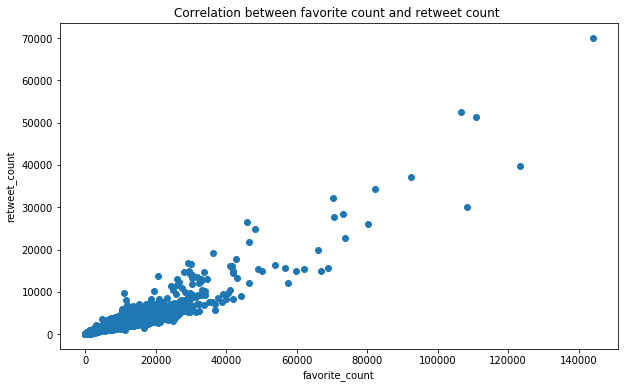

In [116]:
# Finding if there is a correlation between favorite count and retweet count
plt.figure(figsize=(10,6))
plt.scatter(archive_master['favorite_count'],archive_master['retweet_count']);

plt.title("Correlation between favorite count and retweet count ")
plt.xlabel('favorite_count')
plt.ylabel('retweet_count')
plt.show()

There is a positive correlation between favorite count and retweet count where the tweets which were liked most were also retweeted most as observed from the plot above.

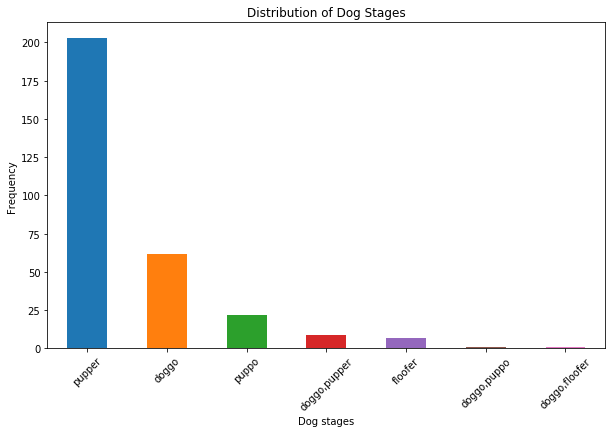

In [117]:
# Finding the distribution of dog stages
plt.figure(figsize=(10,6))
archive_master.dog_stage.value_counts().plot.bar()
plt.title('Distribution of Dog Stages')
plt.xticks(rotation=45)
plt.xlabel('Dog stages')
plt.ylabel('Frequency')
plt.show();

The most popular dog_stage is pupper, followed by doggo, and puppo.

### References
1. https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
2. https://stackoverflow.com/questions/23743460/replace-none-with-nan-in-pandas-dataframe
3. https://stackoverflow.com/questions/33098383/merge-multiple-column-values-into-one-column-in-python-pandas
4. https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns